In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [4]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [5]:
Nbins_inu = 10
G_eff_vec = [1e-4, 1e-3, 1e-2]

In [6]:
Standard = Class() 
Standard.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
Standard.compute()

In [17]:
NoInt = Class() 
NoInt.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0., 
           'tol_inu_synchronous' : Nbins_inu,
         'l_max_inu':10,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3})
NoInt.compute()

cosmo = Class()
cosmo.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
           'N_inu': 3.0,
           'N_ur' : 0.0,
           'YHe' : 0.25,
           'k_output_values' : '1e-4, 1e-2, 1.0',
           'G_eff' : 1e-7,
           'tol_inu_synchronous' : 1e-1})
cosmo.compute()

In [7]:
CYR = {}
for G in G_eff_vec:
    CYR[G] = Class() 
    CYR[G].set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff_CYR' : G, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
    CYR[G].compute()

In [8]:
ISA = {}
for G in G_eff_vec:
    ISA[G]= Class() 
    ISA[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins_inu,
         'l_max_inu':10,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA[G].compute()

CPU times: user 2min 9s, sys: 265 ms, total: 2min 9s
Wall time: 18.1 s
CPU times: user 2min 30s, sys: 314 ms, total: 2min 31s
Wall time: 21.1 s
CPU times: user 3min 7s, sys: 312 ms, total: 3min 7s
Wall time: 25.4 s


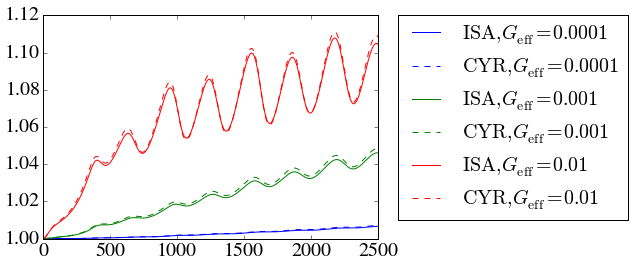

In [21]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in G_eff_vec:
    cl_CYR = CYR[G].raw_cl()
    cl_ISA = ISA[G].raw_cl()
    l = cl_ISA['ell'][2:]
    p = plt.plot(l,cl_ISA['tt'][2:]/clnoint['tt'][2:],label=r'$\mathrm{ISA}, G_\mathrm{eff}='+"{:g}".format(G)+'$')
    colour = p[0].get_color()
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',
             ls='--',color=colour)
#plt.ylim([0.997,1.003])
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
plt.savefig("CYRvsISA.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

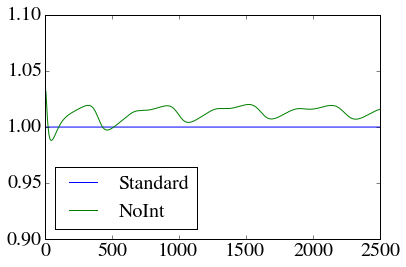

In [20]:
PlotModels = ['Standard','NoInt']
RefModel = 'Standard'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:],label=M)
plt.ylim([0.9,1.1])
plt.legend(loc='lower left')